In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from itertools import product
from tqdm import tqdm_notebook

მომხმარებლების კლასტერიზაცია
-

მომხმარებლებისთვის შექმნილი data-ს ფიჩერებზე უკვე საკმაოდ ვისაუბრეთ. ჩამოვტვირთოთ ეს მონაცემები და დავაკვირდეთ როგორ არიან განაწილებული.

In [2]:
data = pd.read_csv('people_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]

In [3]:
data.head(5)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg,dates_list
0,255,173,1.473988,443.271676,45,127,1,57,116,0,...,0,173,128.450867,2305.352601,2062.595376,81.606936,77.734104,184.537572,0.000000,"[""2014-09-15"", ""2014-09-16"", ""2014-09-17"", ""20..."
1,251,60,4.183333,190.550000,59,1,0,36,24,0,...,0,60,42.500000,1457.166667,1670.283333,76.216667,42.283333,181.200000,0.000000,"[""2015-01-12"", ""2015-01-13"", ""2015-01-14"", ""20..."
2,38,7,5.428571,718.571429,5,2,0,3,4,0,...,2,0,46.142857,1709.857143,1450.857143,0.000000,38.142857,115.857143,17.142857,"[""2014-09-14"", ""2014-09-15"", ""2014-09-16"", ""20..."
3,157,27,5.814815,72.481481,25,2,0,25,2,0,...,0,27,42.703704,912.444444,1483.740741,0.000000,37.074074,99.333333,0.000000,"[""2014-10-21"", ""2014-10-22"", ""2014-11-13"", ""20..."
4,245,179,1.368715,1549.659218,105,73,1,134,45,0,...,29,9,188.379888,2997.938547,2003.910615,121.268156,77.195531,0.000000,35.223464,"[""2014-09-14"", ""2014-09-15"", ""2014-09-16"", ""20..."


In [4]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,286.681993,59.335691,5.202374,172.582329,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,64.574340,1314.682314,1268.971644,31.298231,46.689157,132.642764,6.102309
std,298.370319,54.571850,2.287778,3443.970487,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,33.941369,5338.760788,9694.441291,98.284859,29.028830,476.762583,31.467629
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.500000,42.000000,4.926972,80.617819,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.774849,1245.392857,29.154014,44.731238,127.341061,0.000000
75%,410.000000,92.000000,6.359022,134.026817,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,78.350909,1500.133041,1915.116205,49.166667,58.086413,162.077197,11.501404
max,2938.000000,187.000000,30.000000,342000.000000,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,875.837838,530000.000000,960000.000000,9000.000000,1605.552941,47000.000000,3000.000000


In [5]:
def boxplots(data):
    fig, axes = plt.subplots(4, 8, figsize=(20, 20))
    i = 0
    j = 0
    for feature in data.columns.values:
        sns.boxplot(ax=axes[i, j], x=data[feature])
        if j == 7:
            j = 0
            i += 1
        else:
            j += 1

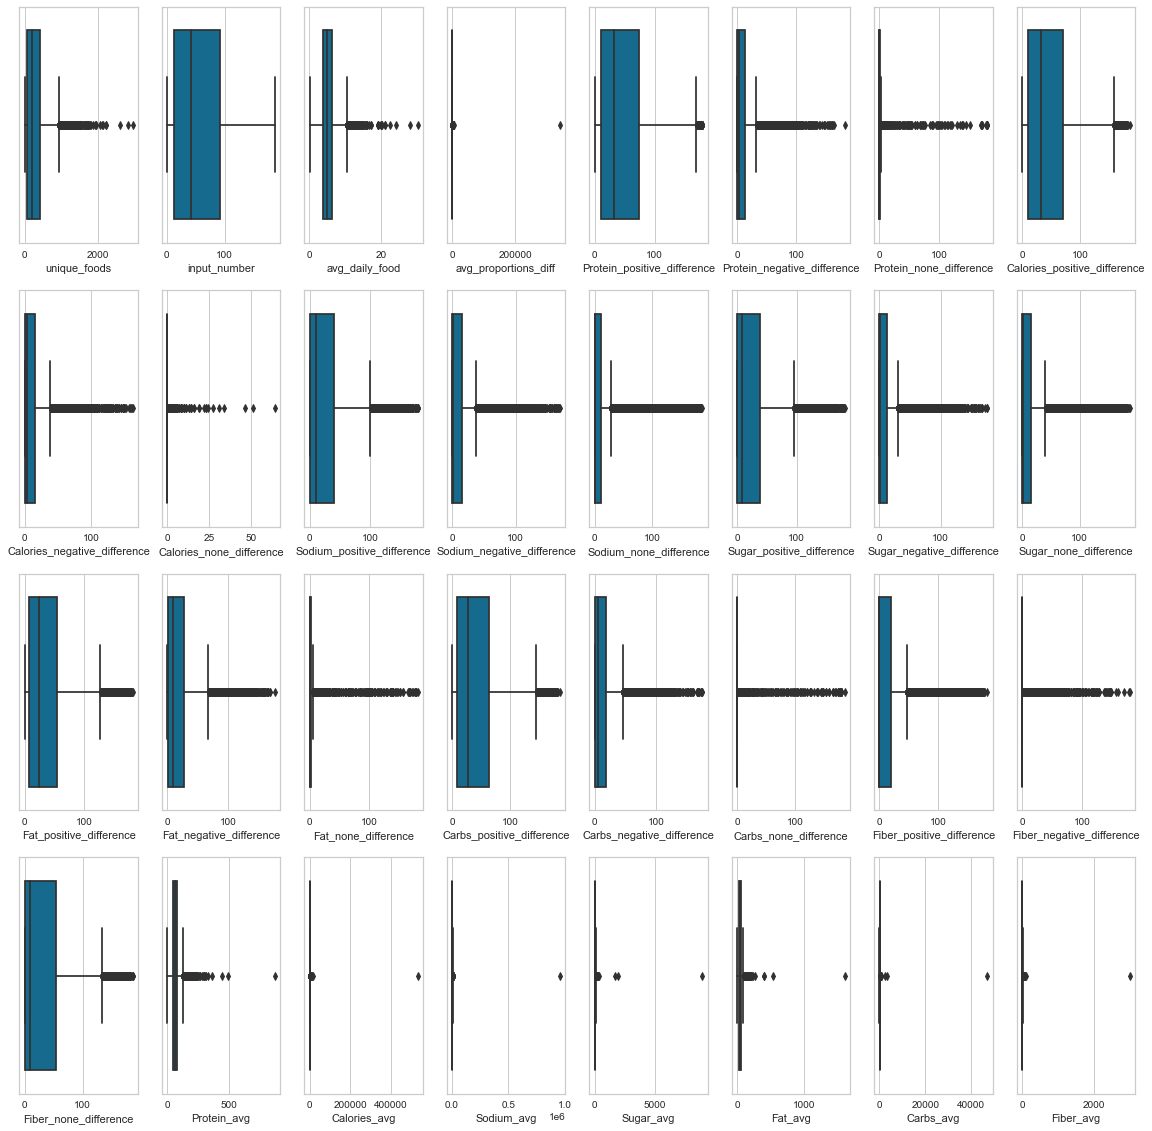

In [6]:
boxplots(data.iloc[:, :-1])

boxplot-ებიდან ბევრი რამის დანახვა შეგვიძლია. ისინი აჩვენებენ რა შუალედშია მოთავსებული მონაცემების 25, 50, 75% და ასევე შეგვიძლია დავინახოთ მონაცემების დაახლოებით 95%-ის შესაბამისი შუალედი, ხოლო ის წერტილები, რომლებიც გარეთაა მოქცეული, შეგვიძლია აუთლაიერებად ჩავთვალოთ. ამ ფიჩერების მიხედვით გაკეთებულ ბოქსპლოტებში ბევრგან ჩანს ამოვარდნა, მაგრამ ჩვენ გადავწყვიტეთ, რომ პირდაპირ ყველა ასეთი აუთლაიერის ჩანაცვლება არასწორი იქნება, რადგან შეიძლება მათი წილი 10%ც იყოს, რაც მონაცემების საკმაოდ დიდი რაოდენობაა, ამიტომ ჩავანაცვლოთ მხოლოდ ისეთი მონაცემები, რომლებიც "ანომალიურად" გვეჩვენება, ანუ აუთლაიერებშიც კი ცალკე არის გამოყოფილი. ეს ლოგიკურიც არის ძირითადად, რადგან მაგალითად avg_proportions_diff ის შემთხვევაში ვხედავთ, რომ 0-1000 შუალედშია მოთავსებული მონაცემების ძალიან დიდი ნაწილი და ამასთან ერთად გვაქვს 200000 ზე დიდი მონაცემებიც, რომლებიც აუცილებლად ამოსაგდებია. ასეთი შესაცვლელი ფიჩერებისთვის ის მნიშვნელობები, რომლებსაც ამოვარდნილად ვთვლით, ჩავანაცვლოთ მედიანით, რადგან ამ მონაცემების დიდ ნაწილში საშუალო მნიშვნელობა რეალობისგან საკმაოდ გადახრილი იქნება. ბოქსპლოტებს თუ დავაკვირდებით, ბევრგან არის, რომ მონაცემების დიდი ნაწილი რაღაც პატარა შუალედშია, და აუთლაიერები დიდი რიცხვებია საკმაოდ, ამიტომ გადავწყვიტეთ მედიანის გამოყენება ჩასანაცვლებლად.

In [7]:
dic = {'unique_foods' : 2500, 'avg_daily_food' : 20, 'avg_proportions_diff' : 1000, 'Protein_avg' : 150, 
       'Calories_avg' : 8000, 'Sodium_avg' : 4800, 'Sugar_avg' : 1000, 'Fat_avg': 250, 'Carbs_avg' : 400,  'Fiber_avg' : 50}

In [8]:
for column in data.columns.values:
    if column not in dic:
        continue
    df = data.loc[:, [column]]
    for i in df.index:
        if df.iloc[i, 0] >= dic[column]:
            data.loc[i, [column]] = data[column].median()

In [9]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,285.898936,59.335691,5.182932,120.055106,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,61.930009,1257.572352,1162.888952,30.022813,46.387352,126.714182,5.715616
std,295.204716,54.571850,2.211731,134.520392,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,27.063410,454.773029,1012.905195,29.229662,23.292256,58.298800,8.920455
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.062500,42.000000,4.925374,80.615385,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.680958,1245.285714,29.149571,44.730784,127.340659,0.000000
75%,409.000000,92.000000,6.347161,131.000000,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,76.338539,1499.849580,1907.065312,49.140397,58.064732,161.636364,11.455492
max,2227.000000,187.000000,19.000000,998.735294,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,149.869863,5925.988950,4784.782123,335.111111,231.000000,389.000000,49.977778


ახლა დავასკალიროთ მონაცემები და შემდეგ დავიწყოთ კლასტერიზაციის პროცესი.

In [10]:
dates = data.iloc[:, -1:]
data = data.iloc[:, :-1]
data = data / data.max()
initial_data = data.copy()
data = data.iloc[:, :25]

In [11]:
data.head()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Sugar_none_difference,Fat_positive_difference,Fat_negative_difference,Fat_none_difference,Carbs_positive_difference,Carbs_negative_difference,Carbs_none_difference,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference
0,0.114504,0.925134,0.077578,0.443833,0.250000,0.697802,0.005556,0.306452,0.716049,0.0,...,0.010695,0.370166,0.587571,0.010989,0.854839,0.079545,0.000000,0.000000,0.000000,0.930108
1,0.112708,0.320856,0.220175,0.190791,0.327778,0.005495,0.000000,0.193548,0.148148,0.0,...,0.005348,0.237569,0.090395,0.005495,0.204301,0.119318,0.005376,0.000000,0.000000,0.322581
2,0.017063,0.037433,0.285714,0.719481,0.027778,0.010989,0.000000,0.016129,0.024691,0.0,...,0.037433,0.027624,0.011299,0.000000,0.032258,0.005682,0.000000,0.027027,0.011173,0.000000
3,0.070498,0.144385,0.306043,0.072573,0.138889,0.010989,0.000000,0.134409,0.012346,0.0,...,0.144385,0.132597,0.016949,0.000000,0.139785,0.005682,0.000000,0.000000,0.000000,0.145161
4,0.110013,0.957219,0.072038,0.080720,0.583333,0.401099,0.005556,0.720430,0.277778,0.0,...,0.005348,0.674033,0.316384,0.005495,0.000000,0.000000,0.962366,0.762162,0.162011,0.048387


სანამ მონაცემებს დავაკლასტერებთ, გამოვიყენოთ ჰოპკინსის სტატისტიკა იმისთვის, რომ დავადგინოთ რამდენად კარგად კლასტერირებადია მონაცემები.

In [12]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(data)

0.9258570785666437

როგორც ვხედავთ, ჰოპკინსის სტატისტიკა საკმაოდ კარგ შედეგს გვაძლევს. ახლა გავარკვიოთ მონაცემების რამდენ კლასტერად დაყოფა არის უპრიანი და ამისთვის გამოვიყენოთ elbow მეთოდი.

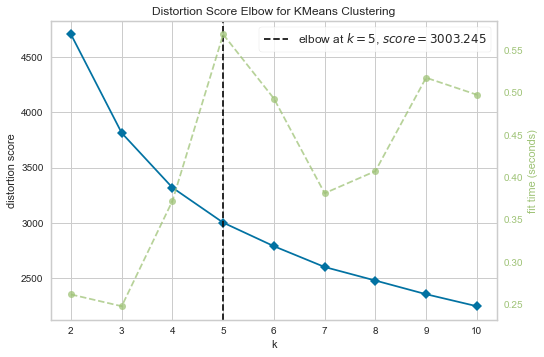

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(data)
visualizer.show()

Elbow მეთოდის მიხედვით, მონაცემები 5 კლასტერად უნდა დაიყოს. ახლა ვცადოთ კლასტერირება. მონაცემებში არ გვაქვს კატეგორიული ცვლადები ან გამოტოვებული მნიშვნელობები, ამიტომ შეგვიძლია კლასტერირება და თან KMeans-ის გამოყენება.

In [15]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(data)

clusters = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

ვიზუალიზაციისთვის გამოვიყენოთ PCA ალგორითმი.

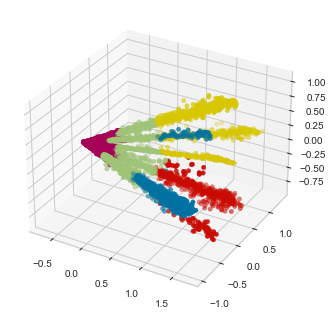

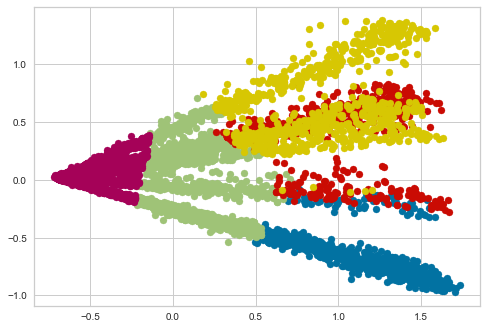

In [16]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 2)

Pca-მ არც ისე ცუდი სურათი მოგვცა, მიუხედავად იმისა, რომ ფიჩერების რაოდენობა საკმაოდ ბევრი იყო და pca-ით 3 და 2 განზომილებაში დაყვანისას დიდი შანსია, რომ საკმაოდ ბევრი მონაცემი დაიკარგებოდა.

In [17]:
data['clusters'] = 0
for i in range(len(clusters)):
    data.loc[clusters[i], ['clusters']] = i

In [18]:
for i in range(len(clusters)):
    print("cluster ", i, len(clusters[i]))

cluster  0 939
cluster  1 2665
cluster  2 589
cluster  3 4919
cluster  4 784


აქ ვნახეთ, რომ მომხმარებლების რაოდენობა საკმაოდ არათანაბრადაა კლასტერებში განაწილებული. სავარაუდოა, რომ მომხმარებლები აქტიურობის მიხედვით არიან დაყოფილი კლასტერებად და ამან გამოიწვია ის, რომ მაგალითად გვაქვს 4919 მომხმარებლიანი კლასტერი, რომელიც სავარაუდოდ შეიცავს იმ მომხმარებლებს, რომლებიც არ არიან აპლიკაციის აქტიური მომხმარებლები, ანუ ეგრეთწოდებული "დამწყებები". ახლა ვნახოთ როგორ არიან მომხმარებლები კლასტერებში განაწილებული თითო ფიჩერის მიხედვით და ამისთვის გამოვიყენოთ stripplot ები, შემდეგ კი გამოვიტანოთ დასკვნები კლასტერების შესახებ.

In [19]:
def draw_clusters(data):
    columns = data.columns.values
    for column in columns:
        plt.figure(figsize=(10,4))
        sns.stripplot(data=data, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

<ipython-input-19-b0aa90144700>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))


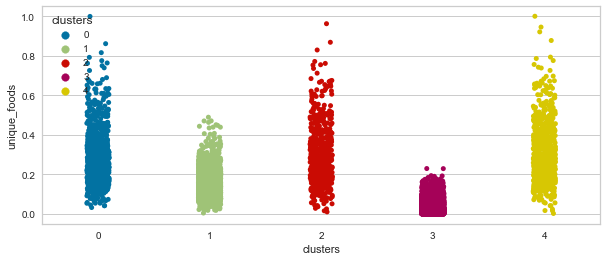

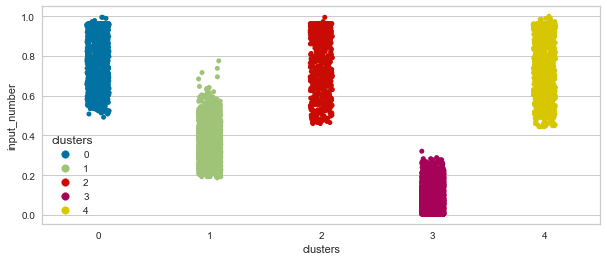

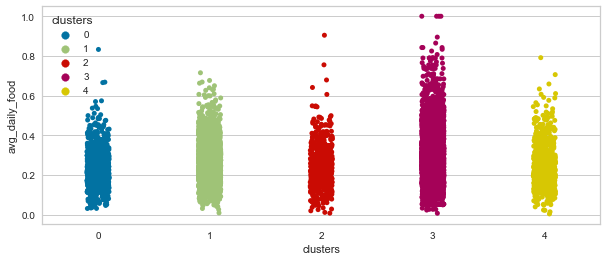

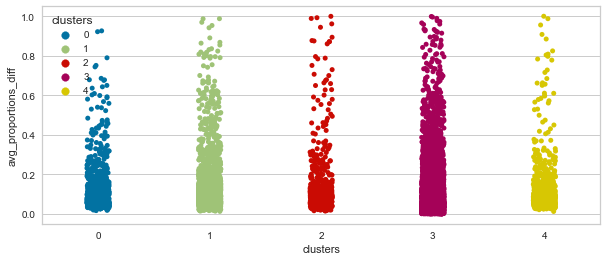

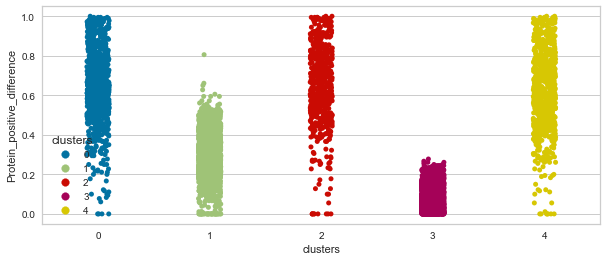

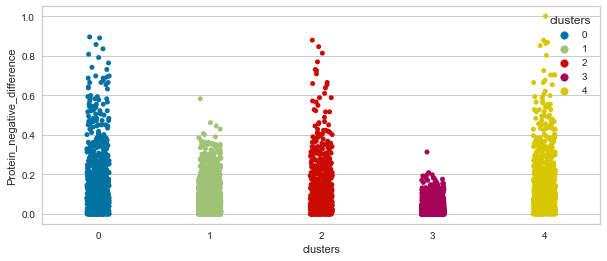

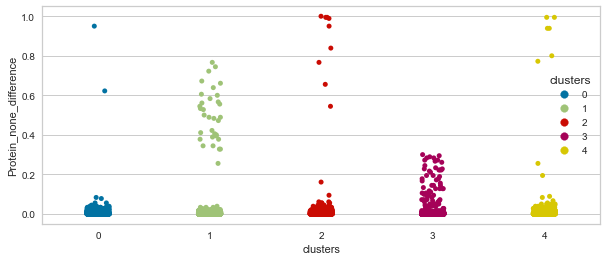

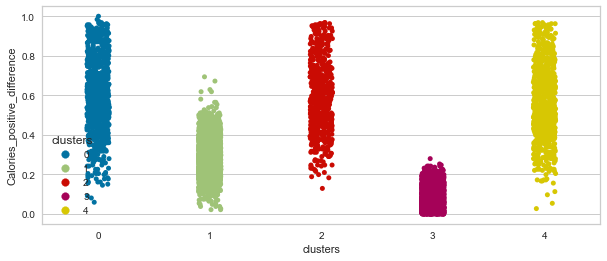

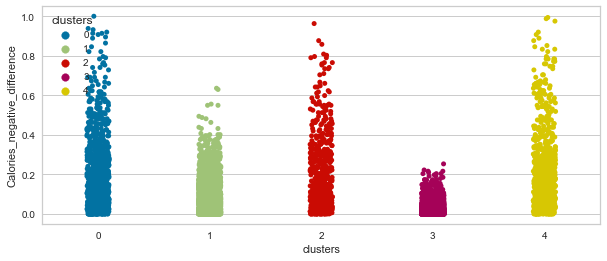

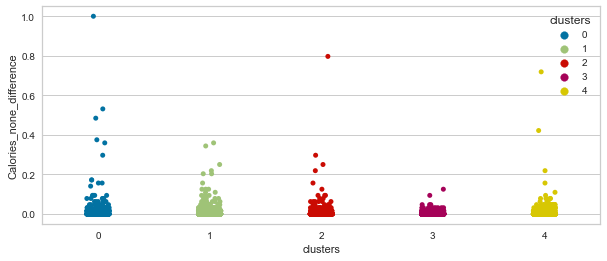

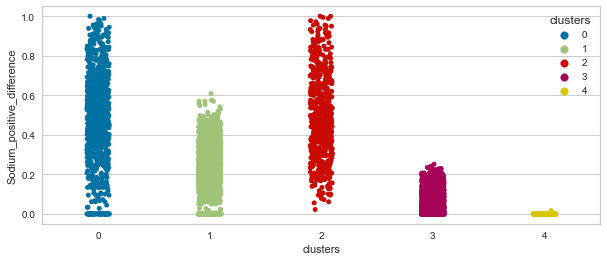

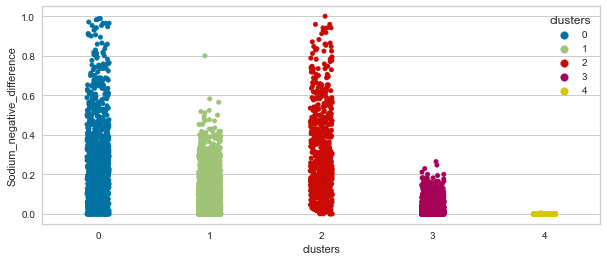

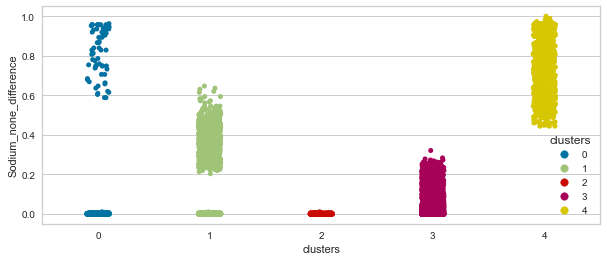

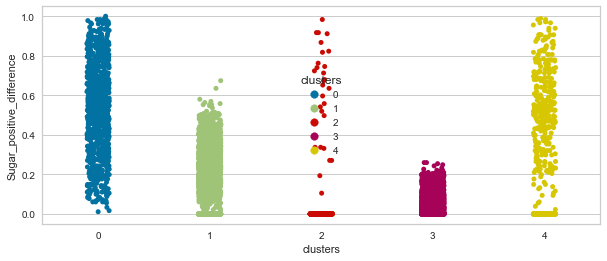

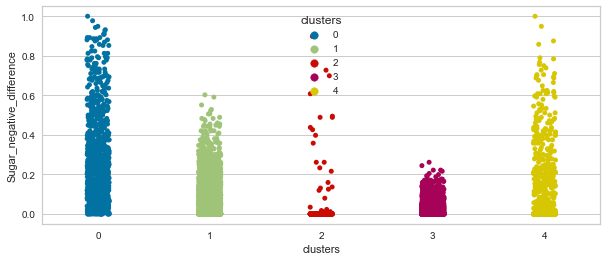

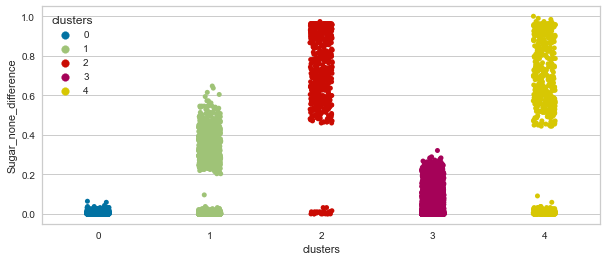

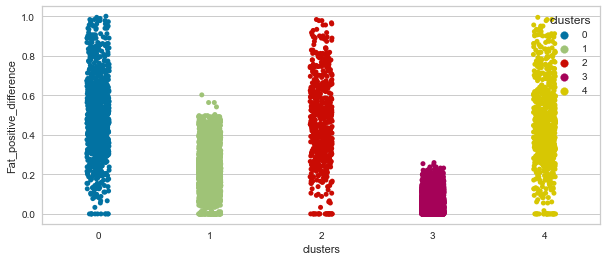

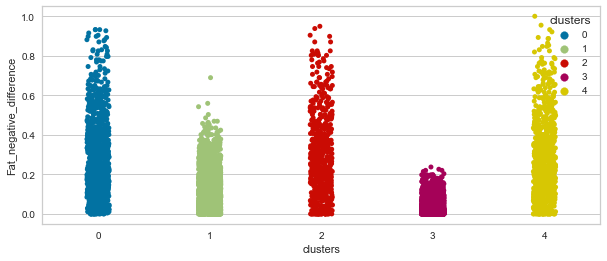

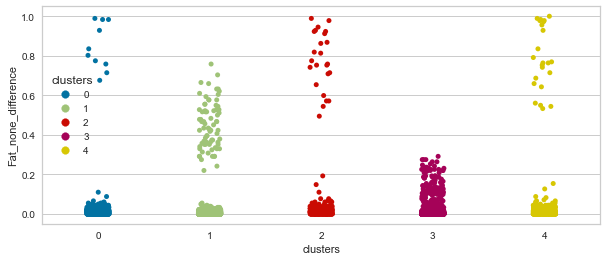

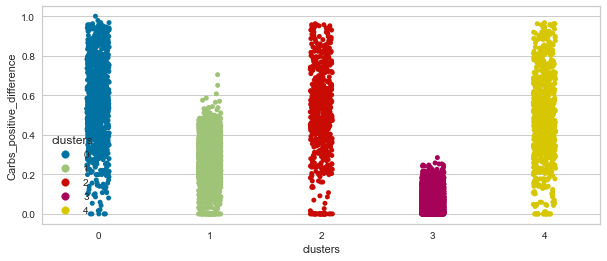

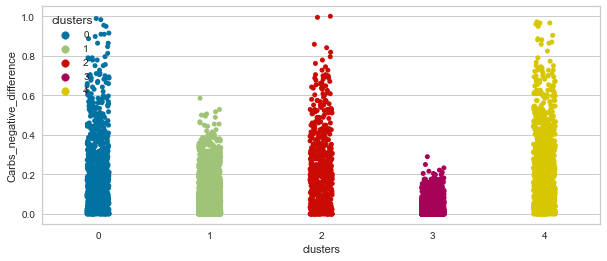

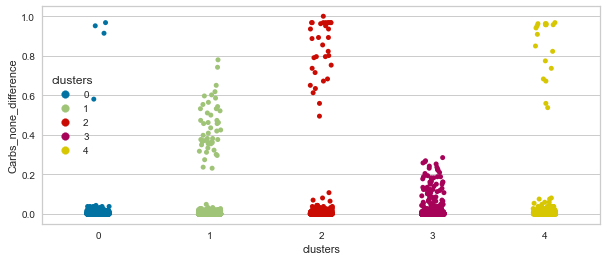

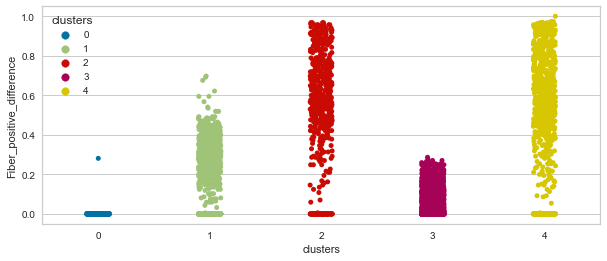

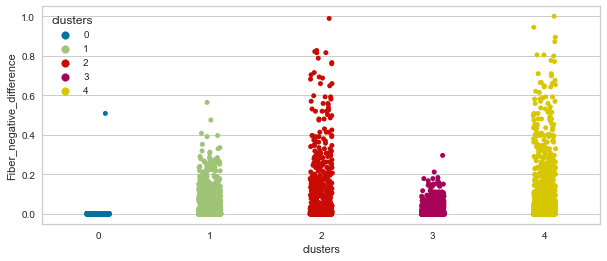

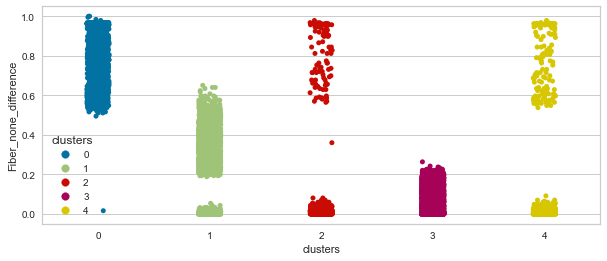

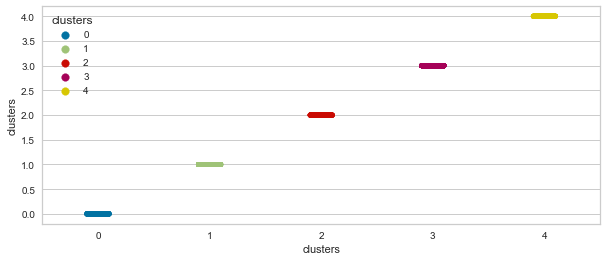

In [20]:
draw_clusters(data)

როგორც ვხედავთ, unique_foods-ის მიხედვით ყველაზე დაბალმაჩვენებლიანი იუზერები მე-3 კლასტერში არიან, შემდეგ კი 1-ში, ხოლო დანარჩენი 3 კლასტერი ერთმანეთს გვანან ამ მაჩვენებლით. ასევე input_number-შიც ყველაზე ნაკლები მონაცემები აქვთ 3 კლასტერში, შედარებით ოდნავ მეტი 1-ში, ხოლო დანარჩენ სამ კლასტერს ერთნაირი მაჩვენებლები აქვთ დაახლოებით. აქედან შეგვიძლია ზუსტად იმ დასკვნის გამოტანა, რომ მე-3 კლასტერის მომხმარებლები არიან ისინი, ვისაც ცოტაჯერ აქვს მონაცემები აპლიკაციაში შეყვანილი და შესაბამისად პასიური მომხმარებელია, პირველ კლასტერში მყოფებს შეიძლება დავარქვათ "საშუალო აქტიურობის" მომხმარებლები, ხოლო დანარჩენი კლასტერის იუზერები უკვე სტაბილური მომხმარებლები არიან აპლიკაციის. avg_daily_food-დან ბევრის თქმა არ შეგვიძლია, უბრალოდ იმის დანახვაა შესაძლებელი, რომ რახან მე-3 და 1 კლასტერებში ბევრი იუზერია რაოდენობრივად, მათი ვარიაციაც შედარებით დიდია, რადგან დღიურად შეყვანილი საჭმლის რაოდენობა ნაკლებადაა დამოკიდებული იუზერების აქტიურობაზე. რაც შეეხება პროპორციებს, აქ შეგვიძლია იმის დანახვა, რომ 1 და 3 კლასტერის იუზერებში უფრო დიდი მაჩვენებლებია აცდენის კალორიების ფორმულიდან (calories = 4 * proteins + 4 * carbs + 9 * fat), ვიდრე დანარჩენების. აქედან ჩნდება იმის ვარაუდი, რომ რახან პირველი და მესამე კლასტერის მომხმარებლები შედარებით ნაკლებად გამოცდილი არიან აპლიკაციის გამოყენებაში, არაადეკვატურად შეყავთ ნუტრიოტების რაოდენობა და ამით შეიძლება კიდევ გამყარდეს ვარაუდი იუზერების აქტიურობის მიხედვით განაწილების შესახებ.
რაც შეეხება დანარჩენ ფიჩერებს, რომლებიც არიან თითო ნუტრიოტის მიხედვით აცდენები (დადებით, უარყოფითი და არარსებული, ანუ ისეთი იუზერები, რომლებმაც საერთოდ არ შეიყვანეს კონკრეტული ნუტრიოტი), მათი მიხედვით უკვე შეგვიძლია დავადგინოთ განსხვავებები 3 "აქტიურ იუზერების" კლასტერებს შორის, კერძოდ, მათი ძირითადი გამნასხვავებელი ნიშანი არის სხვადასხვა ნუტრიოტების გამოუყენებლობა, ანუ ისინი იმით განსხავვდებიან ერთმაენთისგან რომ 7 ძირითადი ნუტრიოტიდან რომელიღაცის შესახებ ინფორმაცია ძალიან იშვიათად შეყავთ აპლიკაციაში. უფრო ზუსტად რომ ვთქვათ, ასეთი ნითიერებები გვაქვს 3: sugar, sodium და fiber. Sodium-ში none_difference აქვს მე-4 კლასტერს იუზერების ძალიან დიდი ნაწილისთვის, ანუ მათ არ შეყავთ ინფორმაცია ამ ნივთიერების შესახებ. ანალოგიური რამ შეგვიძლია ვთქვათ მე-2 კლასტერზე, რომელშიც მართალია რამდენიმე იუზერს აქვს ეს ინფორმაცია შეყვანილი, თუმცა ეს მცირე უზუსტობაა, ძირითადად აქაც none_difference კატეგორიაში არიან იუზერები განაწილებული. ანალოგიური სიტუაციაა 0 ნომრის კლასტერში Fiber ცვლადზე, რომელიც ისედაც ამ ნუტრიოტებს შორის ყველაზე ნაკლებად გამოყენებადი იყო და 0 კლასტერის იუზერებს თითქმის საერთოდ არ აქვთ მასზე ინფორმაცია შეყვანილი. მართალია, fiber-ის არ შეყვანა სხვა კლასტერებშიც ტენდენციაა, თუმცა 0 კლასტერი ყველაზე გამორჩეულია ამით, რასაც none_difference ში მისი ყველაზე დიდი მაჩვენებელი ადასტურებს.
კიდევ ერთი რამ, რისი თქმაც შეიძლება, არის ის, რომ ყველა ნივთიერებისთვის ყველა კლასტერში დადებითი აცდენები უფრო მეტად არის ხოლმე, ვიდრე უარყოფითი აცდენები, რამაც შეიძლება გვაფიქრებინოს, რომ უფრო მეტად მომხმარებლები მომატებას ცდილობენ ამ აპლიკაციით, ვიდრე დაკლებას, მაგრამ ეს სავარაუდოდ არასწორი დასკვნაა, რადგან ძირითადად ასეთი ტიპის აპლიკაციებს რეალურ ცხოვრებაში დაკლების სურვილის მქონე ადამიანები იყენებენ ხოლმე. აქ ჩვენ დასკალირებული მონაცემები გვაქვს და ასეთი დასკვნის გამოტანა პირდაპირ არასწორი იქნება ამიტომ, რადგან შესაძლოა უარყოფითი განსხვავებები რიცხვობრივად უფრო დიდებია, ვიდრე დადებითი. ამის შემოწმება რთული ნადმვილად არ არის და თუ ბოქს პლოტებს კიდევ ერთხელ ჩავხედავთ, მივხვდებით, რომ მართლაც ასე ხდება.

In [21]:
reporting_data = initial_data.iloc[:, 25:]
reporting_data['clusters'] = 0
for i in range(len(clusters)):
    reporting_data.loc[clusters[i], ['clusters']] = i

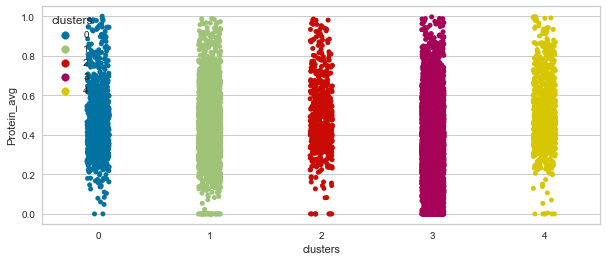

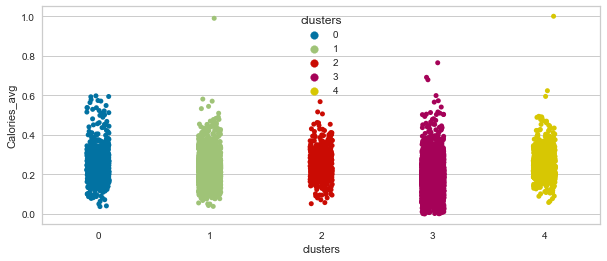

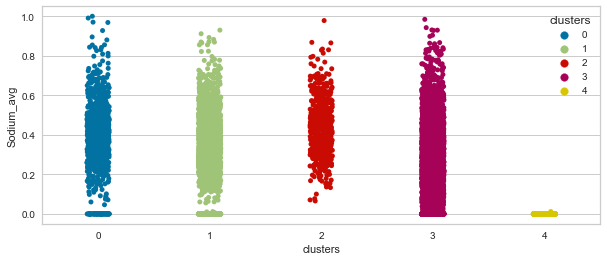

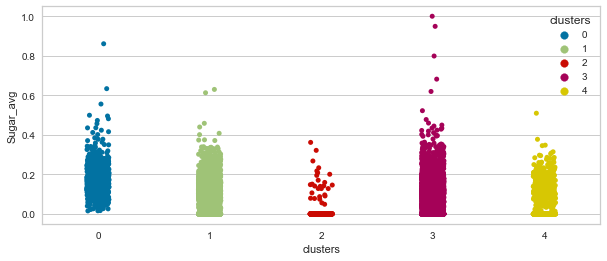

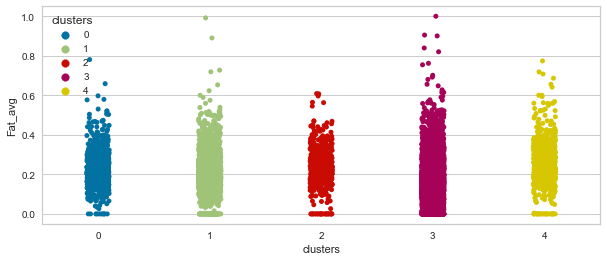

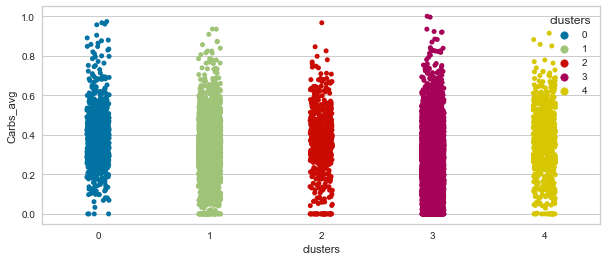

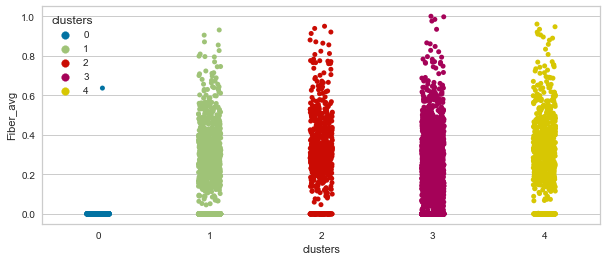

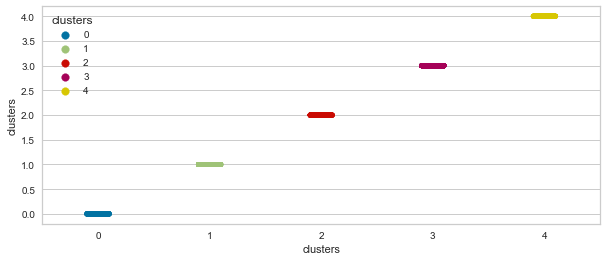

In [22]:
draw_clusters(reporting_data)

აქ არის უკვე რეპორტინგ ცვლადებად აღებული მონაცემების საშუალო და აქედან კიდევ ერთხელ შეგვიძლია ჩვენი გამოტანილი რამდენიმე დასკვნა გავამყაროთ, კერძოდ აქ ჩანს, რომ კლასტერებისთვის იმ ნუტრიოტების საშუალო, რომლებსაც არ იღებდნენ, 0-თან ძალიან ახლოსაა, ხოლო ზოგადი განაწილება თითქმის ერთნაირია ყველა ნუტრიოტის ყველა კლასტერში, რაც ზოგადი ტენდენციაა და ამის მიხედვით დიფერენცირებული არ არიან მიღებული კლასტერები.

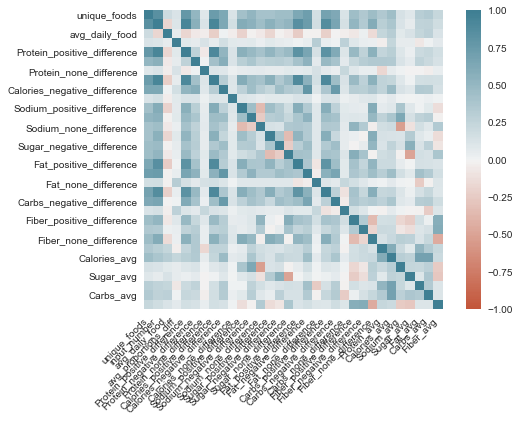

In [23]:
corr = initial_data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

კორელაციის მატრიციდან განსაკუთრებული რამის დანახვა არაა შესაძლებელი. ძირითადად ერთნაირი ნუტრიოტების ცვლადებს შორის არის ხოლმე დიდი კორელაციები, რაც ლოგიკურია.

დღეების კლასტერიზაცია
-

დღეებისთვის შექმნილი data-ს ფიჩერებზეც უკვე ვისაუბრეთ, ამიტომ გადავიდეთ შემდეგ ნაწილებზე.

In [24]:
daysta = pd.read_csv('daily_data.csv')
daysta = daysta[daysta.columns[daysta.columns != 'Unnamed: 0']]
numerical_daysta = daysta[daysta.columns[daysta.columns != 'unique_dates']]
daysta.set_index(['unique_dates'])
daysta.head(5)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743


In [25]:
numerical_daysta.describe()

,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2823.009615,1381.745192,6.781283,130.135576,181.684028,4.751788,4.942420,13.319146,1.523824,50.646341,565.048916,724.280419,21.342681,25.386321,76.977800,6.767068
std,1105.981528,486.888045,0.291943,10.163654,12.463006,0.417965,0.543150,0.769345,0.087888,7.259820,66.284413,55.712396,3.391589,4.556499,11.063870,0.800513
min,17.000000,15.000000,6.245841,103.679487,127.396694,3.925926,2.794872,10.801282,1.345013,43.453844,491.709278,640.293194,18.529412,22.262578,68.661504,5.659091
25%,2162.000000,1107.750000,6.653459,122.723817,172.754553,4.595588,4.615498,12.815120,1.481809,47.045039,523.712028,686.905871,19.946431,23.439186,71.187718,6.286906
50%,2911.000000,1440.000000,6.738386,128.088385,180.628239,4.713085,4.803605,13.175496,1.519664,48.973714,548.922023,711.340450,20.755914,24.218992,74.243684,6.645741
75%,3659.250000,1707.500000,6.863871,136.332791,188.948178,4.837516,5.263893,13.780614,1.542557,52.138481,585.701890,750.226245,21.902209,25.998524,78.833625,7.144929
max,4531.000000,2128.000000,9.927290,199.154111,250.253333,9.610866,9.126229,18.025658,2.274081,119.001695,1032.202398,1097.682515,57.772016,61.545134,179.788701,11.675184


In [26]:
def boxplots_daysta(numerical_daysta):
    fig, axes = plt.subplots(8, 2, figsize=(20, 30))
    i = 0
    j = 0
    for feature in numerical_daysta.columns.values:
        sns.boxplot(ax=axes[i, j], x=numerical_daysta[feature])
        if j == 1:
            j = 0
            i += 1
        else:
            j += 1

In [27]:
def get_right(daysta, column):
    return boxplot_stats(daysta[column]).pop(0)['fliers'].min()

In [28]:
from matplotlib.cbook import boxplot_stats  
dic_less = {'unique_meals' : 250, 'Protein_average_sum' : 6.5, 'Sodium_average_sum' : 158, 'Fat_average_sum'
           :4, 'Carbs_average_sum' : 11.5,'Fiber_average_sum':1.4,  }
dic_more = {'Protein_average_sum' : 7.25, 'Calories_average_sum' : 158, 'Sodium_average_sum' : 218, 
           'Sugar_average_sum' : 5.3, 'Fat_average_sum' : 6, 'Carbs_average_sum' : 15, 'Fiber_average_sum':
           1.65, 'Protein_average_dif' : 60, 
            'Calories_average_dif' : get_right(daysta, 'Calories_average_dif'), 
            'Sodium_average_dif' : get_right(daysta, 'Sodium_average_dif'), 
            'Sugar_average_dif' : get_right(daysta, 'Sugar_average_dif'), 'Fat_average_dif' : get_right(daysta, 'Fat_average_dif'),
            'Carbs_average_dif' : get_right(daysta, 'Carbs_average_dif'), 'Fiber_average_dif' : get_right(daysta, 'Fiber_average_dif')
           }

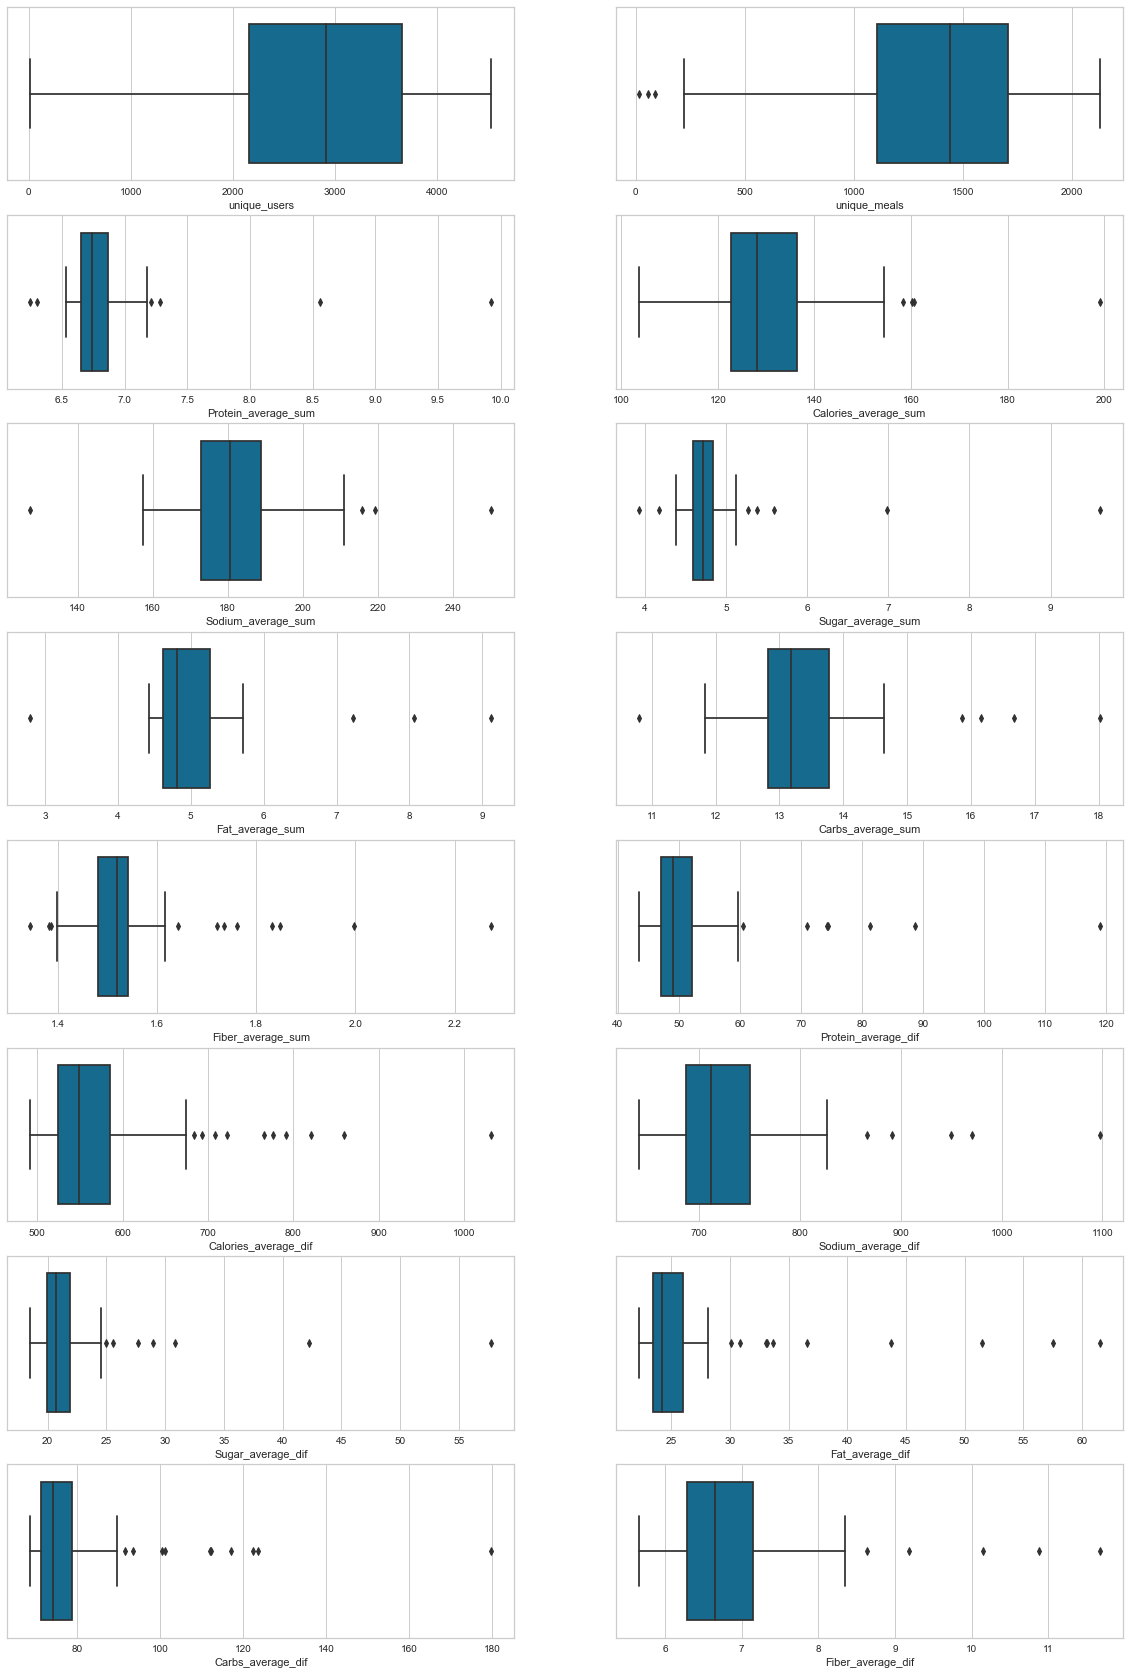

In [29]:
boxplots_daysta(numerical_daysta)

აუთლაიერების ამოღების საჭიროება ამ შემთხვევაშიც იყო, ამიტომ როგორც წინა კლასტერიზაციაში, ზუსტად იგივე რამ გავაკეთეთ აქაც.

In [30]:
for column in numerical_daysta.columns.values:
    df = numerical_daysta.loc[:, [column]]
    if column in dic_more:
        for i in df.index:
            if df.iloc[i, 0] >= dic_more[column]:
                numerical_daysta.loc[i, [column]] = numerical_daysta[column].median()
    if column in dic_less:
        for i in df.index:
            if df.iloc[i, 0] <= dic_less[column]:
                numerical_daysta.loc[i, [column]] = numerical_daysta[column].median()

C:\Users\Uturi\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [31]:
numerical_daysta /= numerical_daysta.max()

In [32]:
hopkins(numerical_daysta)

0.7992955923238465

ჰოპკინსიც მისაღებ შედეგს იძლევა.

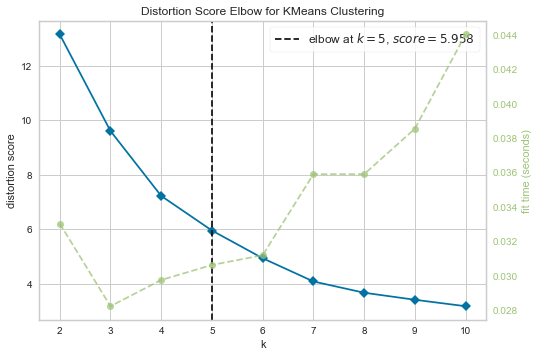

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(numerical_daysta)
visualizer.show()

აქაც აღმოჩნდა, რომ 5 კლასტერი არის მიზანშეწონილი, ამიტომ გავაკეთოთ იგივე ტიპის ალგორითმით კლასტერიზება.

In [34]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(numerical_daysta)

clusters_daysta = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters_daysta[cluster].append(indx)

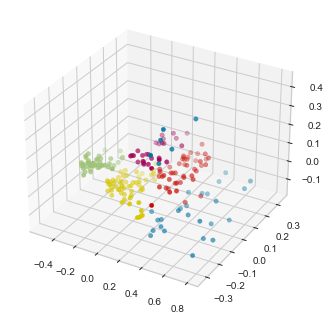

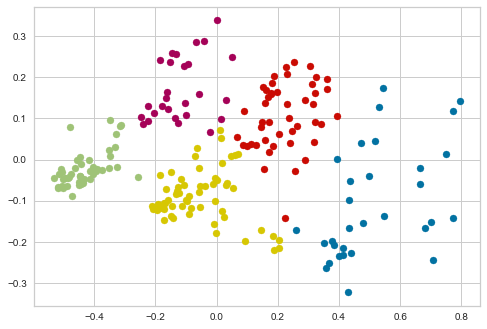

In [35]:
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(numerical_daysta))
plot(np.asarray(pca_components), clusters_daysta, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(numerical_daysta))
plot(np.asarray(pca_components), clusters_daysta, 2)

ვიზუალურად აქაც შეგვიძლია ვთქვათ, რომ მისაღები შედეგია, კიდევ ერთხელ pca-ის მუშაობის პრინციპიდან გამომდინარე.

In [36]:
daysta['clusters'] = 0
for i in range(len(clusters_daysta)):
    daysta.loc[clusters_daysta[i], ['clusters']] = i

In [37]:
def draw_clusters_daysta(daysta):
    columns = daysta.columns.values
    for column in columns:
        if column == 'unique_dates':
            continue
        plt.figure(figsize=(10,4))
        sns.stripplot(data=daysta, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

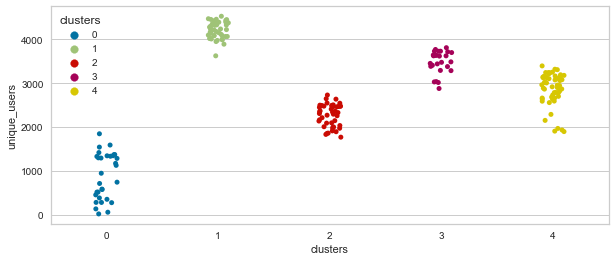

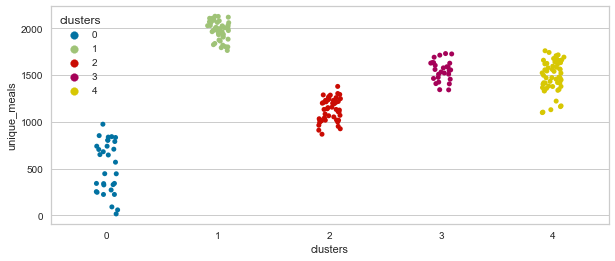

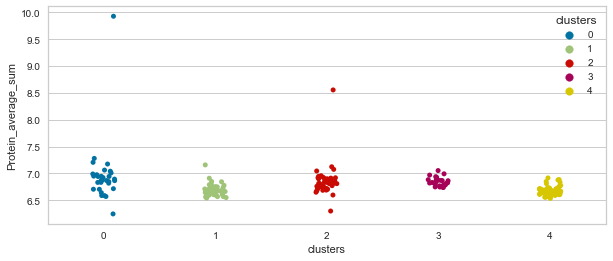

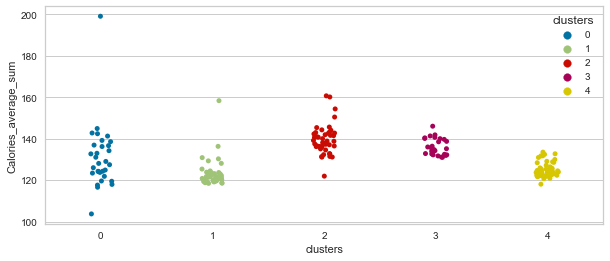

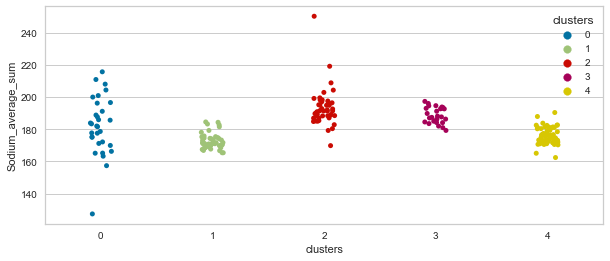

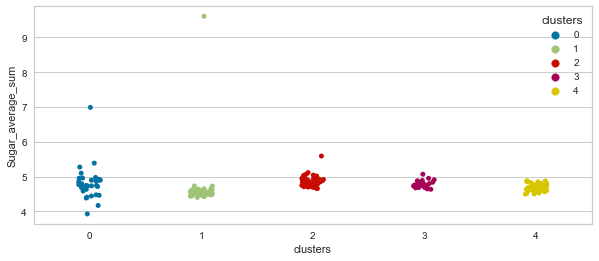

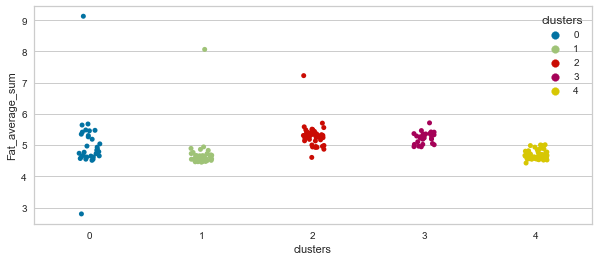

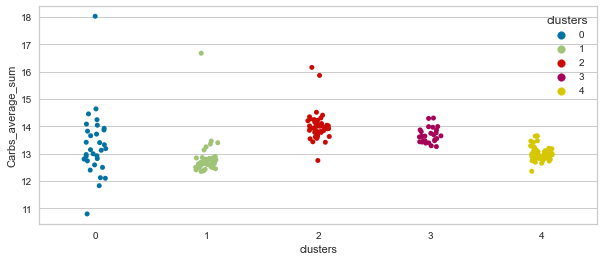

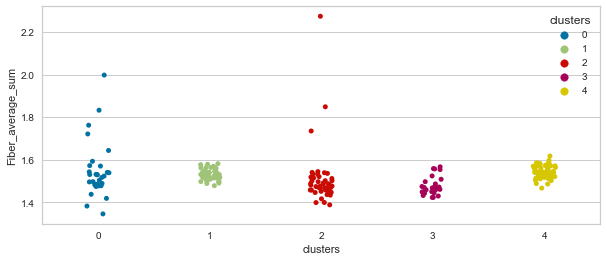

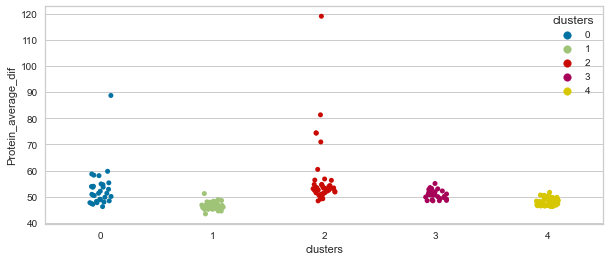

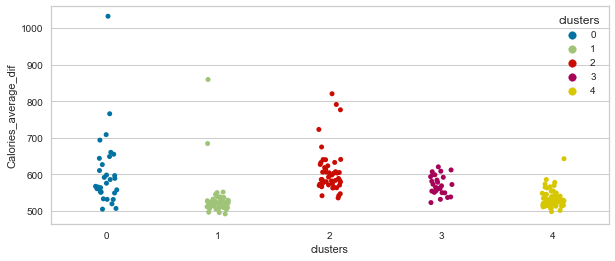

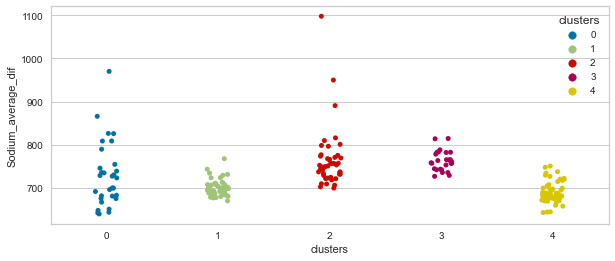

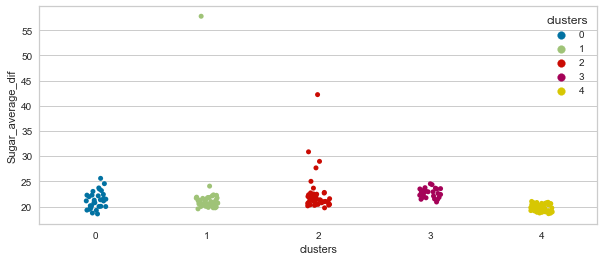

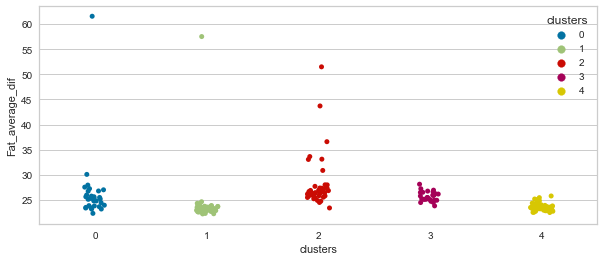

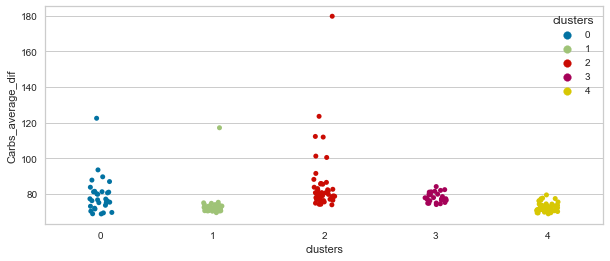

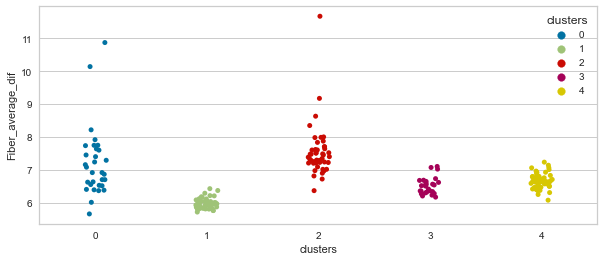

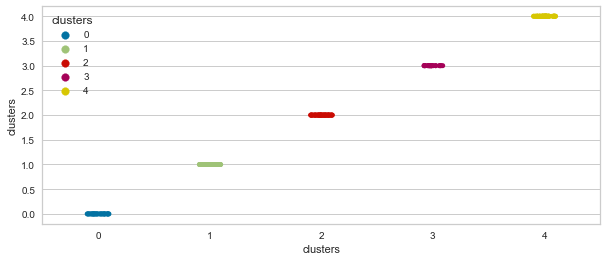

In [38]:
draw_clusters_daysta(daysta)

ამ კლასტერიზაციიდან არის რაღაცეების დანახვა შესაძლებელი. ყველაზე შესამჩნევი ფაქტი არის ის, რომ დღიურად უნიკალური იუზერების და შეყვანილი საჭმლის რაოდენობის მიხედვით კლასტერები ძალიან გვანან ერთმანეთს და თითქმის ზუსტად ერთნაირი თანაფარდობა აქვთ. ეს დიდად ინფორმატიული ფაქტი არ არის, უბრალოდ საინტერესო დამთხვევაა, რომ დაახლოებით 2-ჯერ მეტი არის ხოლმე თითო კლასტერში უნიკალური meal-ების რაოდენობა იუზერებთან შედარებით. ნუტრიოტების სხვაობები goal-სა და total-ს შორის და მათი საშუალო ჯამები არ გვაძლევს ასევე დიდ ინფორმაციას, რადგან მათი განაწილება დაახლოებით ყველა კლასტერში ერთნაირია, რაც მიუთითებს ზოგად ტენდენციაზე და არა ამ ნიშნით განსხვავებაზე. ყველაზე საინტერესო, რაც ამ კლასტერებიდან მივიღეთ, ჩანს მათი ყოველდღიური traffic-ის გრაფიკზე ასახვით, ვნახოთ ეს შედეგი.  

No handles with labels found to put in legend.


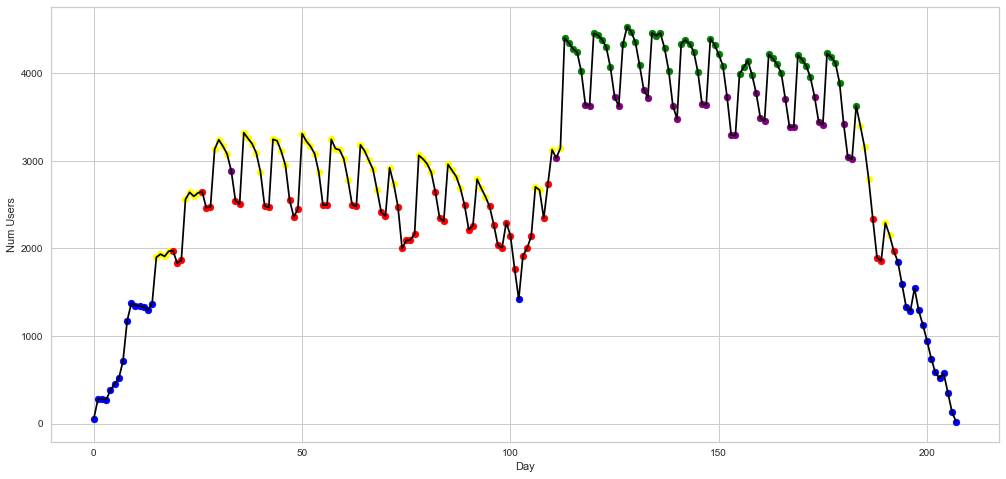

In [39]:
blu = daysta['unique_users']
cur_cluster = daysta['clusters']
plt.figure(figsize=(17, 8))
plt.plot([i for i in range(0, 208)], blu, color='black')
for i in range(0, 208):
    if cur_cluster[i] == 0:
        plt.scatter([i], [blu[i]], color='blue')
    elif cur_cluster[i] == 1:
        plt.scatter([i], [blu[i]], color='green')
    elif cur_cluster[i] == 2:
        plt.scatter([i], [blu[i]], color='red')
    elif cur_cluster[i] == 3:
        plt.scatter([i], [blu[i]], color='purple')
    else:
        plt.scatter([i], [blu[i]], color='yellow')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

როგორც ვხედავთ, ერთმანეთისგან ყველაზე მეტად გამოყოფილი ეს დღეები გამოვიდა სწორედ traffic-ის მიხედვით. ლურჯ კლასტერზე შეგვიძლია ვთქვათ, რომ კიდეებში მოთავსებული დღეები არის აღნიშნული, თუმცა ამ დღეებზე ბევრს ვერაფერს ვიტყვით, რადგან არ ვიცით მართლა ასეთი დაბალი აქტივობაა ამ დღეებში თუ სხვა რამ ხდება. დანარჩენ კლასტერებზე კი შეგვიძლია ბევრი რამე ვთქვათ. თუ გრაფიკს დავაკვირდებით, შევამჩნევთ, რომ გვაქვს რაღაც განმეორებითი ფორმები, იგივე სეზონები. ეს თითო 'კბილი' არის 7 დღიანი პერიოდი, რომელზეც შეგვიძლია შევამჩნიოთ, რომ მაღალი აქტივობის დღეები არის ძირითადად ვიქენდი და მათთან ახლოს დღეები, რადგან ამ დროს ხალხს უფრო სცალია, რომ იზრუნოს სხეულის ფორმებზე თუ კვების რაციონზე. ასევე არის 1 ჩავარდნის დღეც, რომელიც, თუ გამოვთვლით, ვნახავთ, რომ შობას ემთხვევა და ეს არც არის გასაკვირი. შემდეგ კი არის მკვეთრი ზრდა რისი მიზეზის ამოხსნაც ჩვენ არ შეგვიძლია, თუმცა აშკარად გარდამტეხი პერიოდია აქტივობის მხრივ აპლიკაციისთვის. ყვითელ კლასეტრზე ცალსახად შეგვიძლია ვთქვათ, რომ გარდამტეხ პერიოდამდე მაღალი აქტიოვბის დღეებს მოიცავს, თუმცა რამდენიმე დღე გრაფიკის ბოლოშიც არის ამ კლასტერის ნაწილი. იგივე ტიპის დღეებს მოიწავს მწვანე კლასტერი, თუმცა ეს არის უკვე გრაფიკის 'მეორე ნაწილში'. წითელი და იასამნისფერი კლასტერები შესაბამისად არიან ცვლილებამდე და ცვლილების შემდეგ პასიური დღეები.

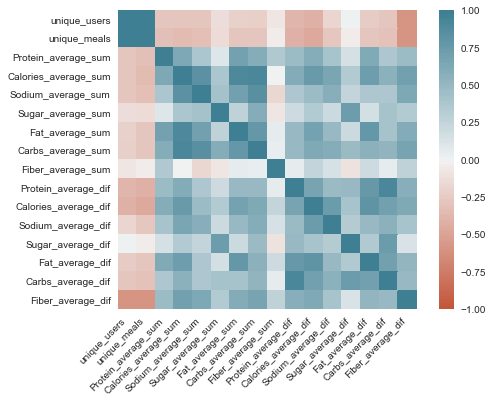

In [41]:
corr = daysta[daysta.columns[daysta.columns != 'clusters']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

კორელაციის მატრიციდან unique_users და unique_meals შორის მაღალი კორელაციის დანახვა შეიძლება, თუმცა ეს როგორც ვთქვით დიდი ინფორმაციის მომცემი ფაქტი არ არის. კალორიებზეც შეგვიძლია დავინახოთ, რომ მისი დამოკიდებულება იმ 3 ნუტრიოტის მიმართ საკმაოდ დიდია, რომლებიც ფორმულად გამოვიყენეთ კალორიების დაახლოებითი რაოდენობის შესაფასებლად (calories = 4 * proteins + 4 * carbs + 9 * fat). კიდევ ერთი საინტერესო ფაქტი არის ის, რომ unique_users-ს (და შესაბამისად unique_meals-ს) აქვთ უარყოფითი დამოკიდებულება ყველა ნუტრიოტის dif და sum ის მიმართ, რაც სავარაუდოდ გამოწვეულია იმით, რომ რაც უფრო მეტი იუზერი მოიხმარს დღის განმავლობაში აპლიკაციას, მით უფრო მეტად შემცირდება საშუალო მნიშვნელობა, რადგან ყოველი ახალი იუზერის დამატება სავარაუდოდ დაბალი მნიშნელობის sum ან dif-ის დამატებას გამოიწვევს აქამდე შეყვანილ მნიშვნელობებთან შედარებით, რაც თავისთავად საშუალო მნიშვნელობას დაწევს.

In [42]:
daysta

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,clusters
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,0
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286,0
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563,0
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226,0
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2015-04-05,515,271,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427,0
204,2015-04-06,574,341,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376,0
205,2015-04-07,351,223,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766,0
206,2015-04-08,132,90,6.832445,116.566238,157.385554,4.169051,4.736802,11.833466,1.832423,54.030303,708.477273,826.106061,21.257576,25.803030,86.848485,5.659091,0


In [43]:
data.head(1)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fat_positive_difference,Fat_negative_difference,Fat_none_difference,Carbs_positive_difference,Carbs_negative_difference,Carbs_none_difference,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,clusters
0,0.114504,0.925134,0.077578,0.443833,0.25,0.697802,0.005556,0.306452,0.716049,0.0,...,0.370166,0.587571,0.010989,0.854839,0.079545,0.0,0.0,0.0,0.930108,0


In [44]:
data['dates_list'] = dates

In [45]:
def get_dates_list(data, i):
    return json.loads(data.loc[i, 'dates_list'])

In [46]:
def get_clusters_info(data, cluster, dictionary):
    df = data.loc[data.clusters == cluster, ['dates_list']]
    for i in df.index:
        dates_list = get_dates_list(data, i)
        for date in dates_list:
            dictionary[date] += 1

In [47]:
unique_dates = daysta['unique_dates']
clusters_info = [{} for _ in range(5)]
for cluster in range(0,5):
    for date in unique_dates:
        clusters_info[cluster][date] = 0
    get_clusters_info(data, cluster, clusters_info[cluster])

In [48]:
active_users_traffic = []
passive_users_traffic = []
average_users_traffic = []
for date in unique_dates:
    passive_users_traffic.append(clusters_info[3][date])
    active_users_traffic.append(clusters_info[0][date] + clusters_info[2][date] + clusters_info[4][date])
    average_users_traffic.append(clusters_info[1][date])

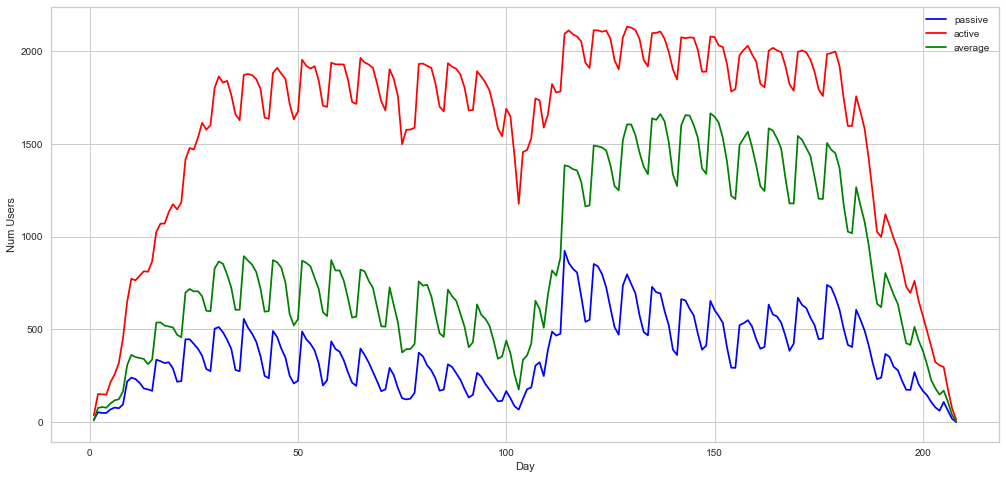

In [49]:
bla = [i for i in unique_dates]
plt.figure(figsize=(17, 8))
plt.plot([i for i in range(1, 209)], passive_users_traffic, color='blue', label='passive')
plt.plot([i for i in range(1, 209)], active_users_traffic, color='red', label='active')
plბt.plot([i for i in range(1, 209)], average_users_traffic, color='green', label='average')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

ამ გრაფიკზე ნაჩვენებია იუზერების დაყოფის მიხედვით დღეების აქტივობები. როგორც ვხედავთ, პასიური იუზერების აქტივობის გრაფიკი ყველაზე დაბლა მოხვდა, მიუხედავად იმისა, რომ მათი ჯამური რაოდენობა ყველა იუზერის დაახლოებით ნახევარია. შემდეგ არის საშუალო იუზერების აქტივობის გრაფიკი. მათი რაოდენობა დაახლოებით ყველა იუზერის მეოთხედია, ასევე არის აქტიური იუზერების ჯამური რაოდენობაც და როგორც ვხედავთ მათი გრაფიკი ყველაზე ზემოთაა, ანუ ეს ნიშნავს, რომ ჩვენი ეს დასვკნა მართებული არის და იუზერების კლასტერები მართლაც ამ ნიშნით არის გამოყოფილი ერთმანეთისგან. თუ ამ გრაფიკებს 'ავჯამავთ', მივიღებთ მთლიანი traffic ის გრაფიკს.

In [50]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns
sns.set()

In [51]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
dsta = daysta.copy()
dsta.set_index(unique_dates, inplace=True)

In [53]:
dsta.head(1)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,clusters
unique_dates,,,,,,,,,,,,,,,,,,
2014-09-14,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,0


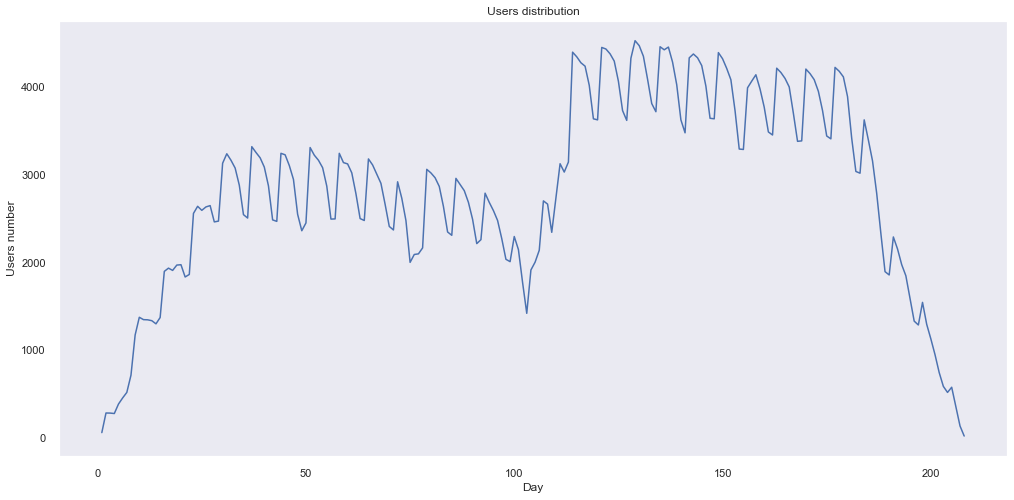

In [54]:
plt.figure(figsize=(17, 8))
plt.plot([i for i in range(1, 209)], dsta.unique_users)
plt.title('Users distribution')
plt.ylabel('Users number')
plt.xlabel('Day')
plt.grid(False)
plt.show()

Moving average

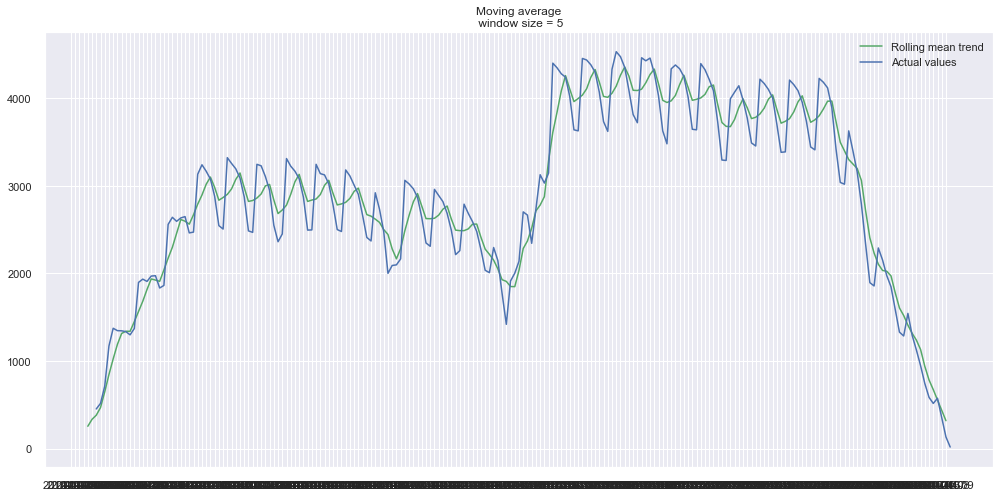

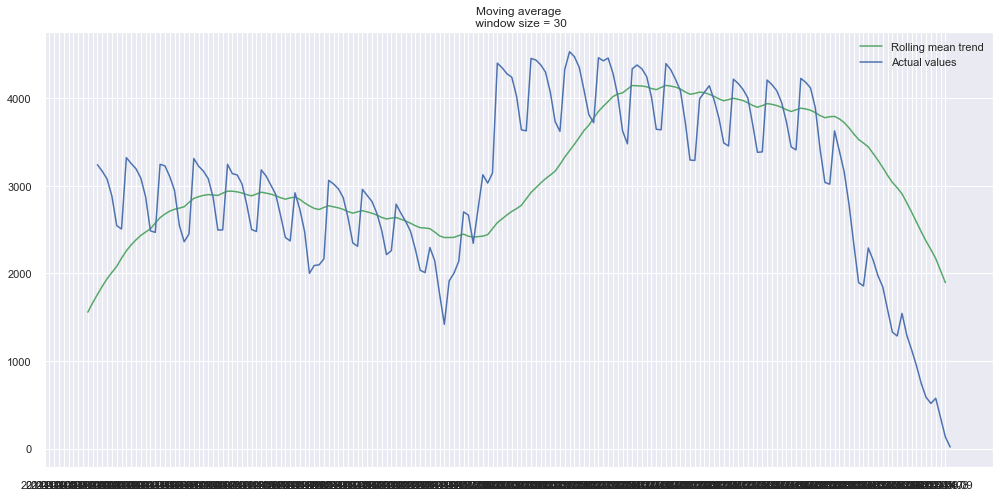

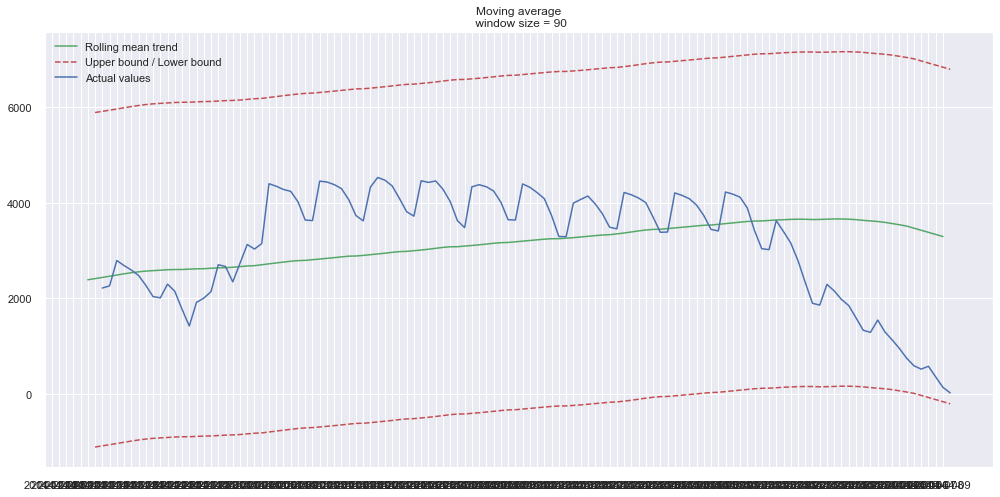

In [55]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    arr = [i for i in range(1, 209)]
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(arr,upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(arr, lower_bound, 'r--')          
    plt.plot(arr[window:], series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(dsta.unique_users, 5)
#Smooth by the previous month (30 days)
plot_moving_average(dsta.unique_users, 30)
#Smooth by previous quarter (90 days)
plot_moving_average(dsta.unique_users, 90, plot_intervals=True)

dickey-fuller test

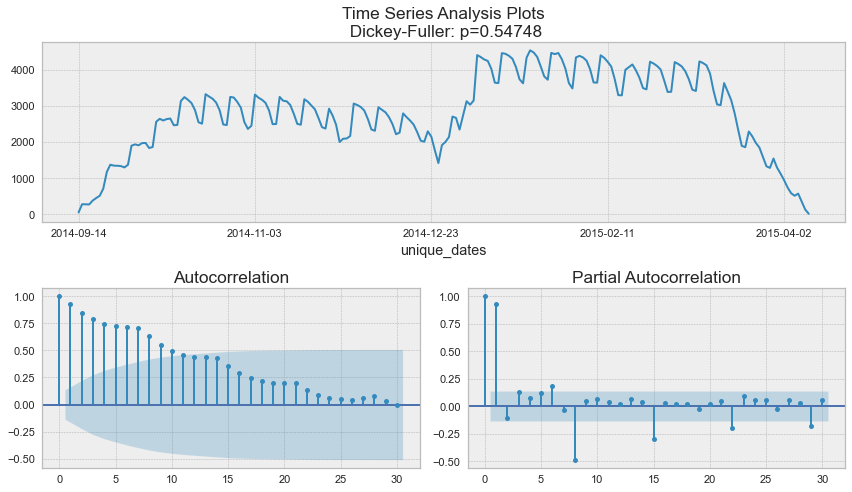

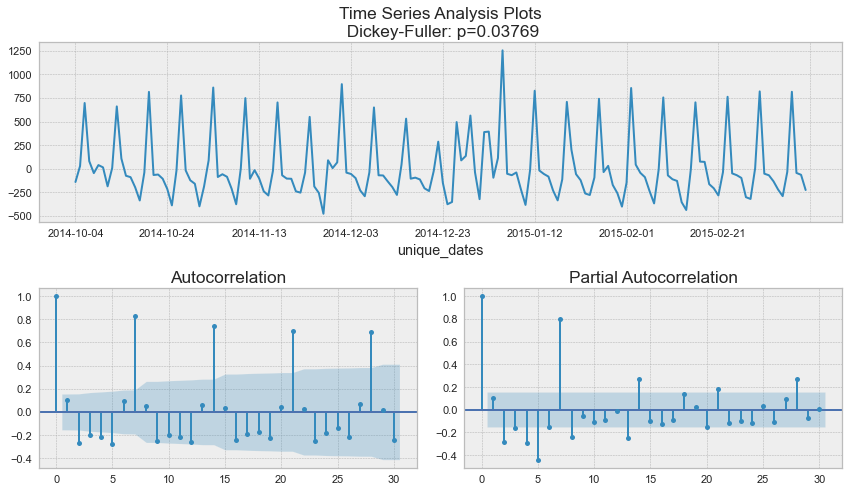

In [57]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(dsta.unique_users, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = dsta.unique_users - dsta.unique_users.shift(1)

tsplot(data_diff[20:180], lags=30)

In [58]:
dsta = dsta.iloc[20:180, :]

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [106]:
ps = range(0, 5)
qs = range(0, 5)
d = 1
parameters = product(ps, qs)

In [107]:
def optimize_ARIMA(parameters_list, d):
    results = []
    best_aic = float('inf')
    for param in tqdm_notebook(parameters_list):
        model = ARIMA(dsta.unique_users, order=(param[0], d, param[1])).fit()
        aic = model.aic
    
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    results = sorted(results, key=lambda x: x[1])
    
    return results[0][0]

In [108]:
p, q = optimize_ARIMA(list(parameters), d)

best_model = ARIMA(dsta.unique_users, order=(p, d, q)).fit()

print(best_model.summary())

<ipython-input-107-d6840bdf7c2b>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


C:\Users\Uturi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Uturi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Uturi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Uturi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Uturi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information


                               SARIMAX Results                                
Dep. Variable:           unique_users   No. Observations:                  160
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1088.620
Date:                Tue, 16 Feb 2021   AIC                           2195.240
Time:                        22:50:11   BIC                           2222.860
Sample:                    10-04-2014   HQIC                          2206.456
                         - 03-12-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8045      0.032     25.147      0.000       0.742       0.867
ar.L2         -1.4353      0.044    -32.576      0.000      -1.522      -1.349
ar.L3          0.7920      0.043     18.437      0.

C:\Users\Uturi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
def plot_ARIMA(series, model, n_steps):
    data = series.copy().rename(columns = {'unique_users': 'actual'})
    data['arima_model'] = model.fittedvalues
    data['arima_model'][:s+d] = np.NaN
    forecast = model.predict(start=data.shape[0], end=data.shape[0] + n_steps)
    forecast = data.arima_model.append(forecast)
    
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    
    plt.figure(figsize=(17, 8))
    plt.title('Mean Absolute Percentage Error: {0:.2f}%'.format(error))
    plt.plot(forecast, color='r', label='model')
    plt.axvspan(data.index[-1], forecast.index[-1],alpha=0.5, color='lightgrey')
    plt.plot(data, label='actual')
    plt.legend()
    plt.grid(True);
    
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

s = 5

print(best_model.predict(start=dsta.unique_users.shape[0], end=dsta.unique_users.shape[0] + 5))
print(mean_absolute_percentage_error(dsta.unique_users[s+d:], best_model.fittedvalues[s+d:]))

2015-03-13    3645.945824
2015-03-14    3284.677533
2015-03-15    3446.342545
2015-03-16    3969.329038
2015-03-17    4115.201801
2015-03-18    3965.705413
Freq: D, Name: predicted_mean, dtype: float64
5.01170280491355


In [114]:
comparison = pd.DataFrame({'actual': dsta.unique_users[-6:],
                          'predicted': [3645.945824, 3284.677533, 3446.342545, 3969.329038, 4115.201801, 3965.705413]})

In [115]:
comparison.head()

,actual,predicted
unique_dates,,
2015-03-07,3443,3645.945824
2015-03-08,3410,3284.677533
2015-03-09,4226,3446.342545
2015-03-10,4182,3969.329038
2015-03-11,4118,4115.201801


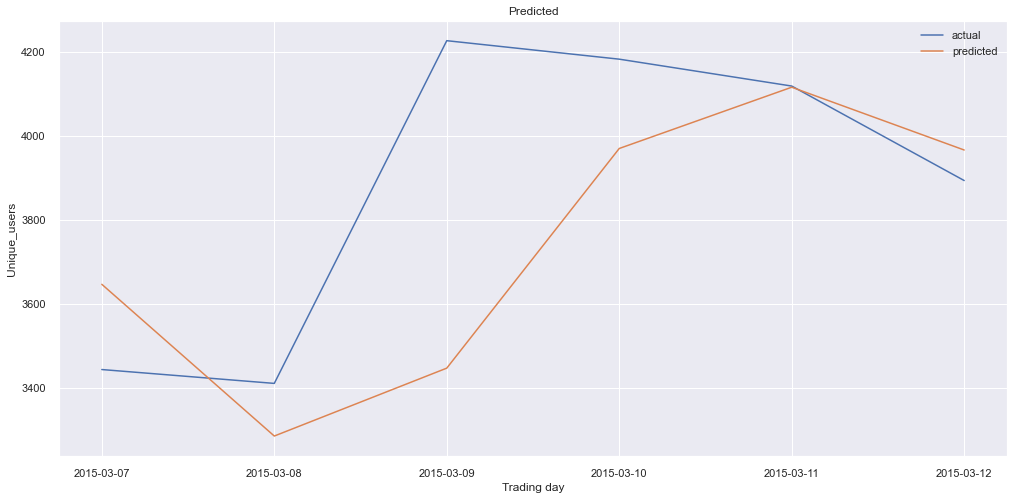

In [116]:
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual, label='actual')
plt.plot(comparison.predicted, label='predicted')
plt.title('Predicted')
plt.ylabel('Unique_users')
plt.xlabel('Trading day')
plt.legend()
plt.show()